In [33]:
from ase.io import read
from ase.geometry.analysis import Analysis

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d

In [34]:
trajs = read(f'Snapshot_12000/Task1_Dynamics.traj', index=':') # Reading all snapshots (trajectory).

Vol = trajs[0].get_volume()                                    # Getting volume from the first snapshot.
print(f'Unit cell volume = {Vol} [A^3].')

Unit cell volume = 718.449183 [A^3].


In [35]:
print(f'Number of snaphots = {len(trajs)}.')

Number of snaphots = 4000.


In [41]:
# Definitions:
n_bins = 10000
r_max  = 8 # The teacher said we should be careful with this value! At a certain point, this loses meaning? Periodic boundary conditions?
global_count = np.zeros(n_bins)
max_d = [] # Checking what is the biggest distance that is verified.

for snapshot in trajs:
    atoms = snapshot[:24]      # Selecting the 24 'O' atoms.
    atoms.append(snapshot[-1]) # Adding the 'Na' atom.

    dist = atoms.get_all_distances(mic = True)[-1][:-1] # [:-1] to get rid off the Na distance (0).
    max_d.append(sorted(dist)[-1])                      # Checking what is the biggest distance that is verified.

    counts, bins  = np.histogram(dist, bins = np.linspace(0, r_max, n_bins + 1, endpoint = True))

    global_count += counts

print(f'Maximum verified distance = {sorted(max_d)[-1]}.')

Maximum verified distance = 7.28957571641596.


Note for myself (not directly related to this Task in specific): If the Na $^{+}$ ion is placed too close to another atom, then we will have an extraordinarily strong force that will kick the interacting atoms away. This might results in the kind of oscillatory motion that we saw before in Snapshot_3. The excess kinetic energy is taken out of the system by the thermostat that's in place!

In [46]:
# Definitions:
final_count = np.zeros(n_bins)
dr          = bins[1] - bins[0]
ind         = list(range(n_bins))

# Number density? We're not really sure how this is defined. Will need to check...
Vol_Max = (4/3)*np.pi*(r_max**3)
rho = (4000*24)/Vol_Max # Multiply by 4000: We had 4000 snapshots! I'm not sure which volume I should include here... Cell Vol. or Sphere?

for bin_count, r, i in zip(global_count, bins, ind): # This doesn't seem to work very well. I guess that's not the definition.
    if (bin_count > 0):
        Volume = 4*np.pi*(r**2)*dr
        final_count[i] = bin_count/(Volume*rho)

Coordination number = 3.918864933817226.


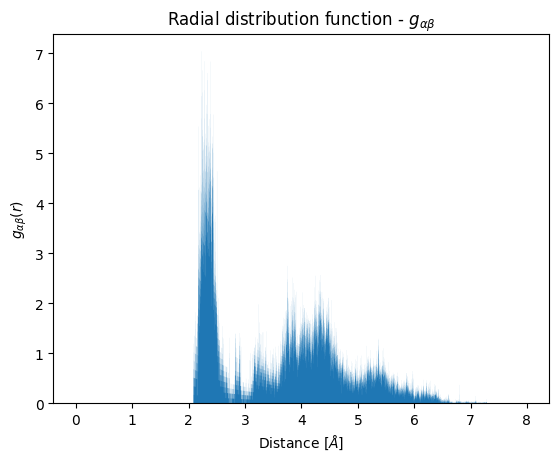

In [47]:
# Plotting resulting histogram:
plt.stairs(final_count, bins, fill = True)
# plt.grid(True)
plt.xlabel(r'Distance [$\AA$]')
plt.ylabel(r'$g_{\alpha \beta} (r)$')
plt.title(r'Radial distribution function - $g_{\alpha \beta}$')

# # What?
# Integral = np.trapz(final_count, dx = dr)
# final_count /= (Integral/24)

print(f'Coordination number = {np.trapz(final_count, dx = dr)}.') # This is integrating everything! Not just until the first minimum, or whatever it was.